# Data Exploration of Myocardial Infarction Dataset

**Setup**

In [34]:
#imports 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


#### Exploring the tabular data 

In [ ]:
# read in data 
df_to_explore = pd.read_csv('../data:/training_data/mixed_demographics.csv')
df_to_explore.head()

,Unnamed: 0,MI,age,BMI,height,weight,diastolic_BP,systolic_BP,sex
0,0,healthy,62.593012,25.312186,161.647749,64.949107,76.057670,137.765801,False
1,1,healthy,58.037959,32.100795,172.543391,94.715477,84.272113,143.459426,False
2,2,pMI,65.840496,26.099055,166.521430,71.650562,75.340419,137.100866,False
3,3,pMI,68.518300,27.672836,166.176884,75.779414,75.697258,140.518093,True
4,4,healthy,55.591381,27.266429,161.314821,70.185424,79.973837,133.740780,False


In [ ]:
# get some basic info on the dataframe
df_to_explore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    900 non-null    int64  
 1   MI            900 non-null    object 
 2   age           900 non-null    float64
 3   BMI           900 non-null    float64
 4   height        900 non-null    float64
 5   weight        900 non-null    float64
 6   diastolic_BP  900 non-null    float64
 7   systolic_BP   900 non-null    float64
 8   sex           900 non-null    bool   
dtypes: bool(1), float64(6), int64(1), object(1)
memory usage: 57.3+ KB


In [ ]:
df_to_explore.isnull().sum()

Unnamed: 0      0
MI              0
age             0
BMI             0
height          0
weight          0
diastolic_BP    0
systolic_BP     0
sex             0
dtype: int64

there are no null values in the data set 

In [ ]:
# check for duplicate rows in the dataframe
#keep first means that it won't return the first instance of the duplicate in the list of indices 
indexes = df_to_explore.duplicated(keep=False)

#identifies all 'True' values in the series indexes and returns their index 
duplicates_indices = indexes[indexes].index.values

#prints all duplicate columns for visual checking
df_to_explore.iloc[duplicates_indices]

,Unnamed: 0,MI,age,BMI,height,weight,diastolic_BP,systolic_BP,sex


In [ ]:
df_to_explore.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,900.0,449.500000,259.951919,0.000000,224.750000,449.500000,674.250000,899.000000
age,900.0,64.111860,2.547381,55.591381,62.219253,64.104358,65.858591,74.011208
BMI,900.0,27.619373,1.820852,19.852576,26.414552,27.654454,28.931890,33.291264
height,900.0,169.691638,4.024141,157.371195,167.063936,169.732035,172.411495,182.634448
weight,900.0,79.180642,7.017943,55.985157,73.972783,79.643591,84.443475,98.216702
diastolic_BP,900.0,78.498092,2.571678,70.409270,76.895646,78.367708,80.274086,86.616991
systolic_BP,900.0,138.327642,3.627310,124.172508,136.111341,138.169542,140.637043,149.831843


In [ ]:
#drops unnamed: 0 column as this is just an index column

df_to_explore.drop(labels = ["Unnamed: 0"], axis=1, inplace=True)
df_to_explore.head()

,MI,age,BMI,height,weight,diastolic_BP,systolic_BP,sex
0,healthy,62.593012,25.312186,161.647749,64.949107,76.057670,137.765801,False
1,healthy,58.037959,32.100795,172.543391,94.715477,84.272113,143.459426,False
2,pMI,65.840496,26.099055,166.521430,71.650562,75.340419,137.100866,False
3,pMI,68.518300,27.672836,166.176884,75.779414,75.697258,140.518093,True
4,healthy,55.591381,27.266429,161.314821,70.185424,79.973837,133.740780,False


#### Exploring the point cloud data 

Point clouds are a way to represent a 3D object via densely packed verticies or "points" along the surface of the object.

## Advantages
- Accurate at representing fairly complex objects
- Quick to creat

## Disadvantages
- Trades off precision obtained via using mathematical formulas
- No information about the surface itself is kept

In [35]:
# Loading one sample geometry
geometry0 = np.load("../data:/training_data/mixed_samples/0healthy.npy")
geometry0.shape

(10, 18000, 4)

Here we see that the dimensions of this tensor is 10 by 18000 by 4

- 10 points in the Cardiac Cycle
- 18000 represents the number of points in each point cloud
- 4 are the attributes of each point: x, y, z and part of the heart

In [36]:
geometry0[:,0]

array([[-20.157444  ,  17.62280464,   8.63055611,   2.        ],
       [-19.19090843,  17.49430275,   9.2532053 ,   2.        ],
       [-18.31469727,  14.26771927,   9.15201092,   2.        ],
       [-17.53883934,  14.00244427,   9.49431133,   2.        ],
       [-17.71179771,  16.30875587,   9.09440136,   2.        ],
       [-18.05838203,  17.30946922,   8.64347363,   2.        ],
       [-17.56122208,  17.19486809,   8.33184052,   2.        ],
       [-16.94767761,  17.58188248,   8.41529942,   2.        ],
       [-17.08619308,  17.50915909,   8.74868774,   2.        ],
       [-17.59795189,  17.17084503,   8.01866531,   2.        ]])

In [37]:
geometry0[0,:,0]



array([-20.157444  , -20.09103012, -20.10420418, ..., -17.84309578,
       -16.25856209, -15.38268089], shape=(18000,))

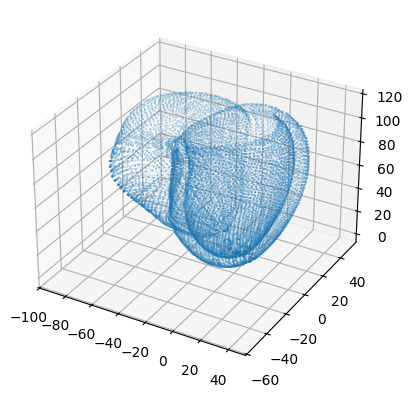

In [61]:
# Plotting a point cloud
fig = plt.figure()
ax = plt.axes(projection='3d')

xs = geometry0[0,:,0]
ys = geometry0[0,:,1]
zs = geometry0[0,:,2]
#heart_part = geometry0[0,:,3]

ax.scatter3D(xs,ys,zs, s = 0.05)
